In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [19]:
from collections import Counter

colors = ["red", "dodgerblue", "springgreen", "orange", "magenta", "black", "maroon", "aqua", "gold"]

def compute_sill(X, min_clusters, max_clusters, label):
    arr = []
    max_clusters = min(X.shape[0], max_clusters)
    for n_clusters in range(min_clusters, max_clusters+1):
        clust = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, n_init=100)
        clust.fit(X)
        pred = clust.predict(X)
#         print(n_clusters, ":", Counter(pred))
        arr.append(silhouette_score(X, pred))
    plt.plot(range(min_clusters, max_clusters+1), arr, label=label)
    plt.legend()
    
def clust_and_plot(X, n_clusters, sill=True):
    clust = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, n_init=100)
    clust.fit(X)
    pred = clust.predict(X)
    
#     print(Counter(pred))

    fig, ax = plt.subplots(1,3,figsize=(16,5))
    ax[0].set_title("X")
    ax[1].set_title("Y")
    ax[2].set_title("Z")

    permut = np.random.permutation(range(X.shape[0]))
    pred = pred[permut]
    
    for i, row in enumerate(X[permut]):
        ax[0].plot(range(MAX_POS+1), row[range(0, MAX_POS+1)], c=colors[pred[i]], alpha=.5)
        ax[1].plot(range(MAX_POS+1), row[range(MAX_POS+1, 2*MAX_POS+2)], c=colors[pred[i]], alpha=.5)
        ax[2].plot(range(MAX_POS+1), row[range(2*MAX_POS+2, 3*MAX_POS+3)], c=colors[pred[i]], alpha=.5)
        if i > 1000:
            break
            
    return clust.cluster_centers_,  \
           np.array([np.std(c - X, 0) for c in clust.cluster_centers_]), \
           pred

ValueError: Number of labels is 4. Valid values are 2 to n_samples - 1 (inclusive)

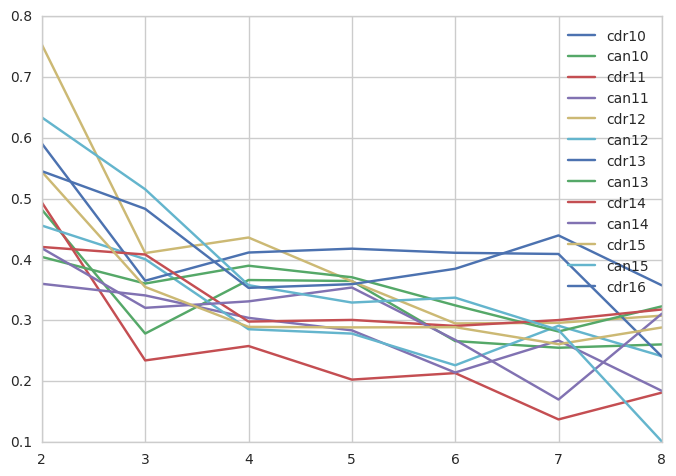

In [20]:
for MAX_POS in range(10, 17):
    arr_cdr_coord = pd.read_csv("data/cdr." + str(MAX_POS) + ".csv.gz", index_col=0).ix[:, 1:14].values
    arr_can_coord = pd.read_csv("data/can." + str(MAX_POS) + ".csv.gz", index_col=0).ix[:, 1:14].values
    compute_sill(arr_cdr_coord, 2, 8, "cdr"+str(MAX_POS))
    compute_sill(arr_can_coord, 2, 8, "can"+str(MAX_POS))
# compute_sill(arr_put_coord, 2, 10, "put")